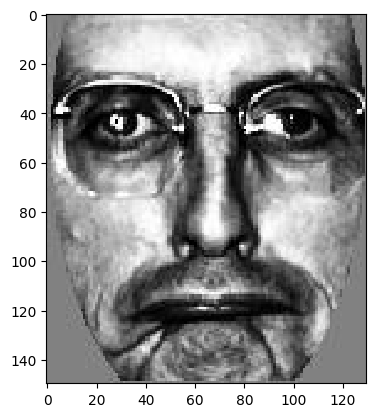

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.image as img
image = img.imread('00001fa010.930831.jpg') ## Load an image as numpy array
plt.imshow(image, interpolation='nearest') #display the image
plt.gray()  #grayscale conversion
plt.show()


In [3]:
# read the first 10 rows and columns of the image
image[1:10,1:10]

array([[128, 127, 128, 129, 129, 129, 129, 130, 123],
       [128, 128, 128, 129, 130, 128, 125, 130, 124],
       [129, 128, 127, 129, 130, 126, 120, 114, 124],
       [130, 129, 127, 129, 131, 125, 115, 100, 120],
       [131, 129, 126, 128, 131, 123, 110, 113, 129],
       [131, 130, 126, 128, 132, 122, 106, 124, 142],
       [132, 130, 125, 128, 132, 121, 104, 113, 142],
       [136, 131, 121, 146, 121, 121, 116, 121, 131],
       [133, 131, 121, 137, 123, 111, 118, 117, 127]], dtype=uint8)

In [4]:
image[5,1]

131

In [5]:
import numpy as np
import os
images=[]

for filename in os.listdir('.'):
        image = img.imread(filename)
        images.append(image)

In [6]:
len(images)

3772

In [7]:
flattened_images=np.array([img.reshape((19500,)) for img in images])
flat_and_centered = flattened_images-np.mean(flattened_images,axis=0)

print(f"flattened image shape: {flattened_images.shape} flat and center: {flat_and_centered.shape}")

cov_matrix = np.cov(flat_and_centered)
print(f"cov matrix shape: {cov_matrix.shape}")

flattened image shape: (3772, 19500) flat and center: (3772, 19500)
cov matrix shape: (3772, 3772)


In [8]:
eigenvalues, eigenvectors = np.real(np.linalg.eig(cov_matrix)[0]),np.real(np.linalg.eig(cov_matrix)[1])

In [9]:
print(f"shape eignenvalues: {eigenvalues.shape} shape eigenvectors: {eigenvectors.shape}")
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]
eigenvectors.shape
X_pca = flat_and_centered.T.dot(eigenvectors)


shape eignenvalues: (3772,) shape eigenvectors: (3772, 3772)


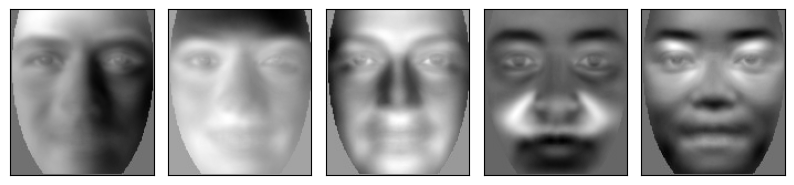

In [10]:
eigenfaces=X_pca.T

fig, axes = plt.subplots(1, 5, figsize=(10, 20), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(eigenfaces[i].reshape(150, 130), cmap='gray')

plt.show()

In [11]:
K=100

(19500,)
(19500,)
(19500,)
(19500,)
(19500,)


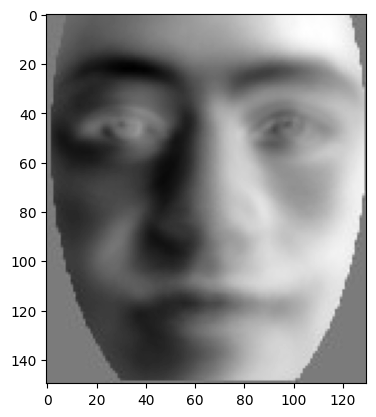

In [12]:
weights_training=np.array([np.zeros((K,)) for i in range(3772)])
for ind,i in enumerate(eigenfaces):
  weights_training[ind]=np.dot(i.T,flat_and_centered[ind])
for j in range(5):
  plt.imshow(flat_and_centered[j].reshape(150,130))
  plt.savefig(f'/content/drive/MyDrive/{j}_original.png')
  vec=np.zeros(19500,)
  for i in eigenfaces:
    weight=np.dot(i.T,flat_and_centered[j])
    vec=np.add(vec,np.dot(weight,i))
  print(vec.shape)
  plt.imshow(vec.reshape(150,130))
  plt.savefig(f'/content/drive/MyDrive/{j}_reconstructed.png')

In [13]:
weights_training.shape

(3772, 100)

In [14]:
%cd /content/drive/MyDrive/Test1
imagestest=[]
for filename in os.listdir('.'):
        image = img.imread(filename)
        imagestest.append(image)

/content/drive/MyDrive/Test1


In [15]:
flattened_test =np.array([img.reshape((19500,)) for img in imagestest])
test_centered = flattened_test-np.mean(flattened_test,axis=0)

In [16]:
test_centered.shape

(44, 19500)

In [17]:
weights=np.zeros((K,))

In [18]:
for ind,i in enumerate(eigenfaces[:K]):
  weights[ind]=(np.dot(i.T,test_centered[1]))

In [19]:
weights.shape

(100,)

In [22]:
weights_training[0].shape

(100,)

In [29]:
(weights-weights_training[i]).shape

(100,)

In [44]:
from numpy.linalg import norm

In [65]:
import sys
min_weight=sys.maxsize
pic_ind=0
for i in range(3772):
  if np.linalg.norm(weights)-np.linalg.norm(weights_training[i])<min_weight:
    min_weight=np.linalg.norm(weights)-np.linalg.norm(weights_training[i])
    pic_ind=i

9223372036854775807


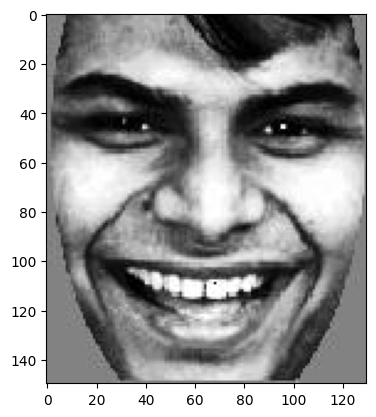

In [66]:
plt.imshow(images[i])

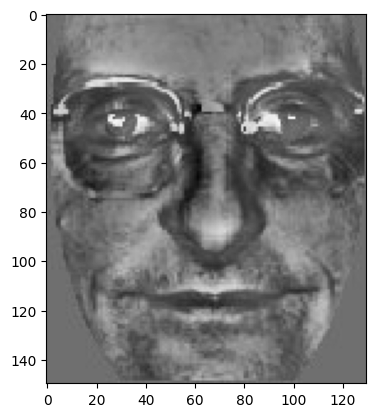

In [64]:
plt.imshow(test_centered[1].reshape(150,130))